In [22]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [23]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score


df_knn=pd.read_csv('iris.csv')
#Selecting the random rows
df_knn.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
69,5.6,2.5,3.9,1.1,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [74]:

print (df_knn.isnull().sum())
print (df_knn.isna().sum())
print ('So, There are no missing values.')


Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64
Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64
So, There are no missing values.


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_knn['Class'].values)
print(integer_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [76]:
df_knn['Class_new']=integer_encoded
df_knn.head()
df_knn.drop('Class',axis=1,inplace=True)
df_knn.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_new
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [77]:
corr_mat=df_knn.corr()
print(corr_mat)

                      Sepal Length (in cm)  Sepal Width in (cm)  \
Sepal Length (in cm)              1.000000            -0.109369   
Sepal Width in (cm)              -0.109369             1.000000   
Petal length (in cm)              0.871754            -0.420516   
Petal width (in cm)               0.817954            -0.356544   
Class_new                         0.782561            -0.419446   

                      Petal length (in cm)  Petal width (in cm)  Class_new  
Sepal Length (in cm)              0.871754             0.817954   0.782561  
Sepal Width in (cm)              -0.420516            -0.356544  -0.419446  
Petal length (in cm)              1.000000             0.962757   0.949043  
Petal width (in cm)               0.962757             1.000000   0.956464  
Class_new                         0.949043             0.956464   1.000000  


In [78]:
values_less=corr_mat[corr_mat['Class_new']<=0.1]
value=values_less.index.values
df_knn.drop(value,axis=1,inplace=True)
df_knn.head()


,Sepal Length (in cm),Petal length (in cm),Petal width (in cm),Class_new
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [81]:
df_knn.var()

Sepal Length (in cm)    0.685694
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class_new               0.671141
dtype: float64

In [82]:
print('There are no features having less than 0.1 variance so keeping all of them.')

There are no features having less than 0.1 variance so keeping all of them.


## Question 6

*Plot the scatter matrix for all the variables.*

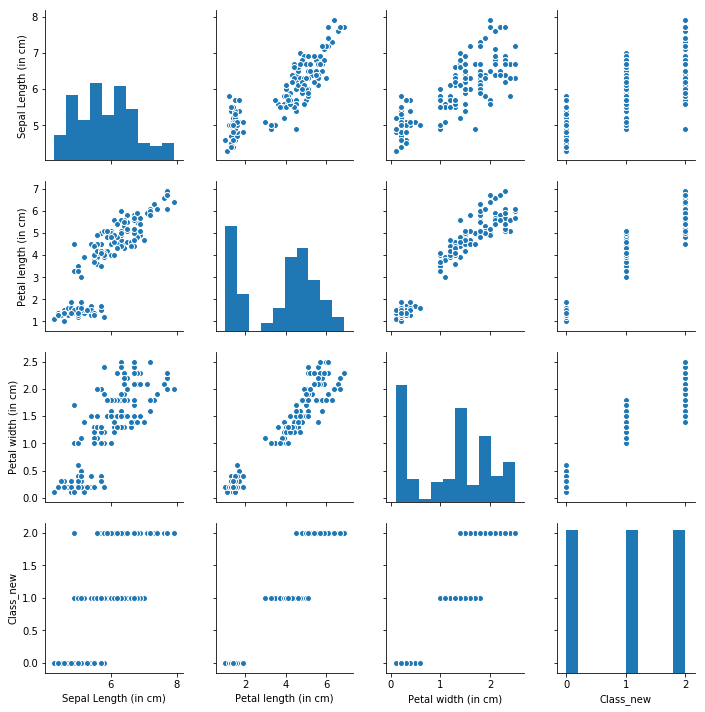

In [83]:
import seaborn as sns
sns.pairplot(df_knn)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [84]:
from sklearn.model_selection import train_test_split
independent=df_knn.iloc[:,0:-1]
## scaling all variables
#independent = independent.apply(zscore)

dependent=df_knn.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train      Sepal Length (in cm)  Petal length (in cm)  Petal width (in cm)
58                    6.6                   4.6                  1.3
97                    6.2                   4.3                  1.3
129                   7.2                   5.8                  1.6
114                   5.8                   5.1                  2.4
146                   6.3                   5.0                  1.9, 
 y_train 58     1
97     1
129    2
114    2
146    2
Name: Class_new, dtype: int64
--------------------------------------------------------------------------------------------------
X_test      Sepal Length (in cm)  Petal length (in cm)  Petal width (in cm)
87                    6.3                   4.4                  1.3
111                   6.4                   5.3                  1.9
10                    5.4                   1.5                  0.2
91                    6.1                   4.6                  1.4
49                    5.0                

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [85]:
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [86]:
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [87]:
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [88]:
from sklearn.model_selection import cross_val_score
neighbors=list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.941511530980828,
 0.9081689358155043,
 0.9251180883578771,
 0.9081689358155043,
 0.9163656571269798,
 0.9245623784384551,
 0.9330369547096415,
 0.9081689358155043,
 0.883023061961656,
 0.8914976382328424]

In [89]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
for i in range(len(neighbors)):
    print ('with K',neighbors[i],':', MSE[i])

print (' ')
print ('Model with lowest MSE:',min(MSE))

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)


with K 1 : 0.05848846901917204
with K 3 : 0.09183106418449571
with K 5 : 0.07488191164212288
with K 7 : 0.09183106418449571
with K 9 : 0.08363434287302018
with K 11 : 0.07543762156154488
with K 13 : 0.06696304529035846
with K 15 : 0.09183106418449571
with K 17 : 0.11697693803834397
with K 19 : 0.10850236176715755
 
Model with lowest MSE: 0.05848846901917204
The optimal number of neighbors is 1


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

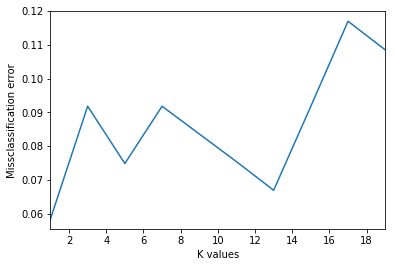

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neighbors, MSE)
plt.xlim(1,19);
plt.xlabel('K values')
plt.ylabel('Missclassification error');

# Naive Bayes with Iris Data

In [4]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [5]:
df_naive=pd.read_csv('Iris.csv')
y=df_naive['Class']
X=df_naive.iloc[:,0:-1]

In [6]:
#Check the dataset
print(y)
print ('')
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

             Class  count      prop
0  Iris-versicolor     50  0.333333
1   Iris-virginica     50  0.333333
2      Iris-setosa     50  0.333333


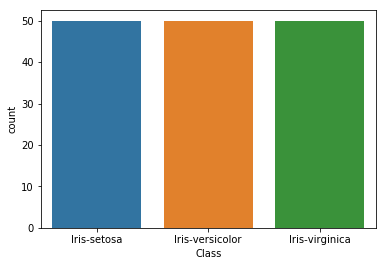

In [7]:
## Target Variable Frequency Distribution
freq = df_naive['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(y)

In [8]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [9]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [10]:
df_naive.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [11]:
print ('We can clearly see that the Petal length and petal width having highest of correlation i.e 96%. So removing any one of the vairables will increase accuracy.')

We can clearly see that the Petal length and petal width having highest of correlation i.e 96%. So removing any one of the vairables will increase accuracy.


In [12]:
df_naive.drop('Petal length (in cm)',axis=1,inplace=True)
df_naive.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal width (in cm),Class
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_naive['Class'].values)
df_naive['Class_new']=integer_encoded
df_naive.head()
df_naive.drop('Class',axis=1,inplace=True)
df_naive.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal width (in cm),Class_new
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


### Split data in Training and test set in 80:20.

In [14]:
from sklearn.model_selection import train_test_split
y=df_naive['Class_new']
X=df_naive.iloc[:,0:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

X_train      Sepal Length (in cm)  Sepal Width in (cm)  Petal width (in cm)
58                    6.6                  2.9                  1.3
97                    6.2                  2.9                  1.3
129                   7.2                  3.0                  1.6
114                   5.8                  2.8                  2.4
146                   6.3                  2.5                  1.9, 
 y_train 58     1
97     1
129    2
114    2
146    2
Name: Class_new, dtype: int64
--------------------------------------------------------------------------------------------------
X_test      Sepal Length (in cm)  Sepal Width in (cm)  Petal width (in cm)
87                    6.3                  2.3                  1.3
111                   6.4                  2.7                  1.9
10                    5.4                  3.7                  0.2
91                    6.1                  3.0                  1.4
49                    5.0                  3.3      

### Question 13 
Do Feature Scaling 

In [15]:
# Use StandardScaler or similar methods

In [24]:
## scaling all variables
independent = X.apply(zscore)
dependent=y

### Question 14 
Train and Fit NaiveBayes Model

In [25]:
#Fit the model
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
#Predict
y_pred=NB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [27]:
# show Confusion Matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  0, 10],
       [ 0,  0, 13],
       [ 0,  0,  7]], dtype=int64)

In [28]:
# show accuracy
accuracy_score(y_test, y_pred)

0.23333333333333334

In [29]:
#Show precision and Recall metrics

In [30]:
from sklearn.metrics import precision_recall_curve
print(metrics.recall_score(y_test, y_pred,average='macro'))
print(metrics.precision_score(y_test, y_pred,average='macro'))

0.3333333333333333
0.07777777777777778


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779